In [1]:
import scanpy as sc 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### UMAP

In [2]:
scfoundation = np.load('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/pancrea_data_embedding/embeds_scfoundation.npy')
adata = sc.read_h5ad('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/pancrea_data_embedding/pancreas1.h5ad')

In [3]:
scfoundation_adata = sc.AnnData(scfoundation, obs=adata.obs.copy())

In [4]:
sc.pp.neighbors(scfoundation_adata)
sc.tl.umap(scfoundation_adata, min_dist=0.3)
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.3)

/Users/liuxinyuan/miniforge3/envs/myenv/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 3072 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/Users/liuxinyuan/miniforge3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/liuxinyuan/miniforge3/envs/myenv/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 24905 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [8]:
scfoundation_adata

AnnData object with n_obs × n_vars = 6321 × 3072
    obs: 'tech', 'celltype', 'n_counts'
    uns: 'pca', 'neighbors', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

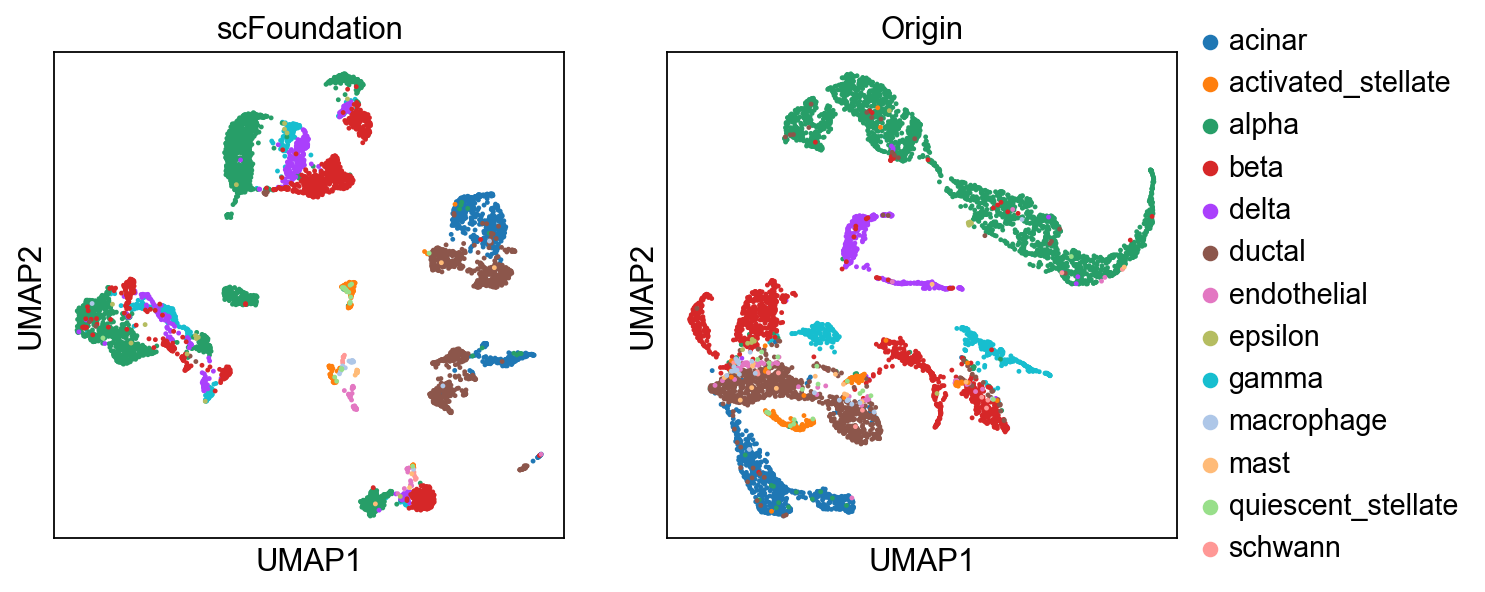

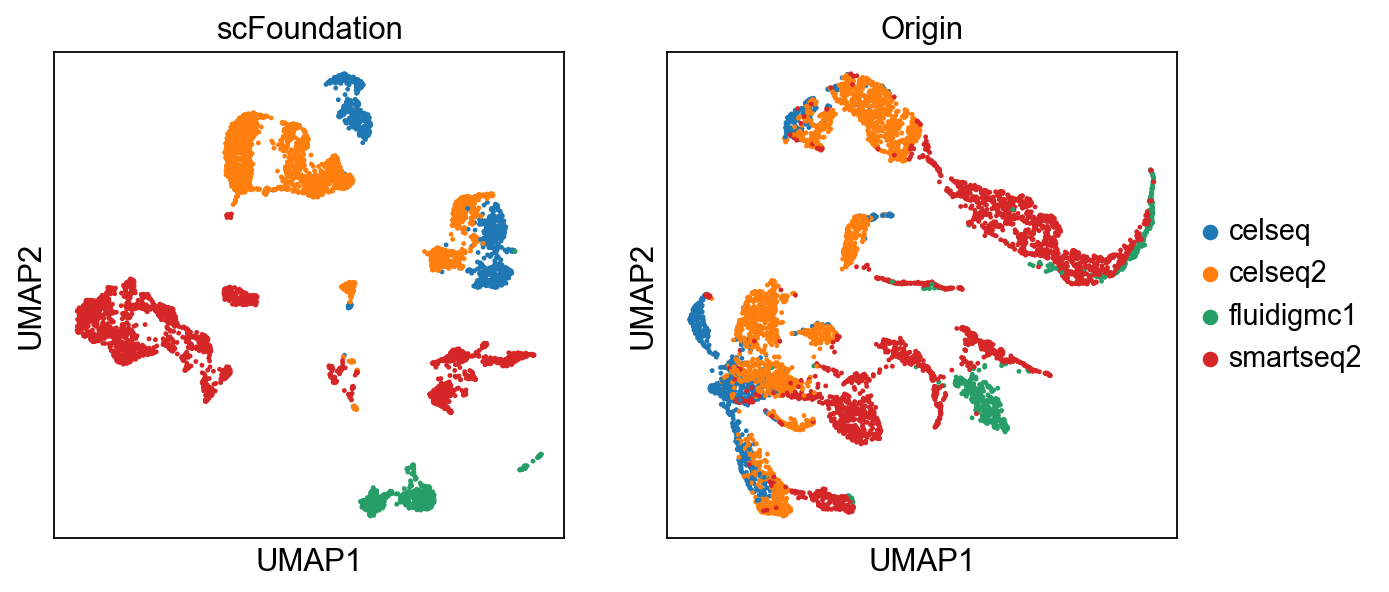

In [11]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
sc.set_figure_params(figsize=(4, 4))
plt.rcParams["font.family"] = "Arial"

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sc.pl.umap(scfoundation_adata, color=["celltype"], ax=axes[0], show=False, legend_loc=None)
axes[0].set_title("scFoundation") 

sc.pl.umap(adata, color=["celltype"], ax=axes[1], show=False)
axes[1].set_title("Origin")
plt.savefig('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plots/supplement/UMAP/scfoundation_pancrease.png',dpi=300,bbox_inches='tight')

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
sc.set_figure_params(figsize=(4, 4))
plt.rcParams["font.family"] = "Arial"

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sc.pl.umap(scfoundation_adata, color=["tech"], ax=axes[0], show=False, legend_loc=None)
axes[0].set_title("scFoundation") 

sc.pl.umap(adata, color=["tech"], ax=axes[1], show=False)
axes[1].set_title("Origin")
plt.savefig('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plots/supplement/UMAP/scfoundation_pancrease_tech.png',dpi=300,bbox_inches='tight')

In [15]:
pd.DataFrame(scfoundation_adata.obsm['X_umap']).to_csv('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plots/supplement/UMAP/scfoundation_umap_coord.csv')
pd.DataFrame(adata.obsm['X_umap']).to_csv('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plots/supplement/UMAP/origin_umap_coord.csv')

In [22]:
adata = sc.read_h5ad('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/pancrea_data_embedding/pancreas1.h5ad')
query = pd.read_csv('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/results/gpt_ft/freeze_enc/rna_query.csv',index_col=0,header=None)
refer = pd.read_csv('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/results/gpt_ft/freeze_enc/rna_refer.csv',index_col=0,header=None)

In [23]:
df_combined = pd.concat([refer, query],axis=0)
df_comb_reindex = df_combined.reindex(adata.obs.index)

In [24]:
adata.obsm['X_scGPT'] = df_comb_reindex.values.copy()

In [25]:
adata.obs['map'] = 'reference'
# adata.obs[adata.obs['tech']!='smartseq2','map'] = 'reference'
adata.obs.loc[adata.obs['tech']=='smartseq2','map'] = 'query'

In [26]:
sc.pp.neighbors(adata, use_rep="X_scGPT")
sc.tl.umap(adata, min_dist=0.3)

/Users/liuxinyuan/miniforge3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/liuxinyuan/miniforge3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/liuxinyuan/miniforge3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprec

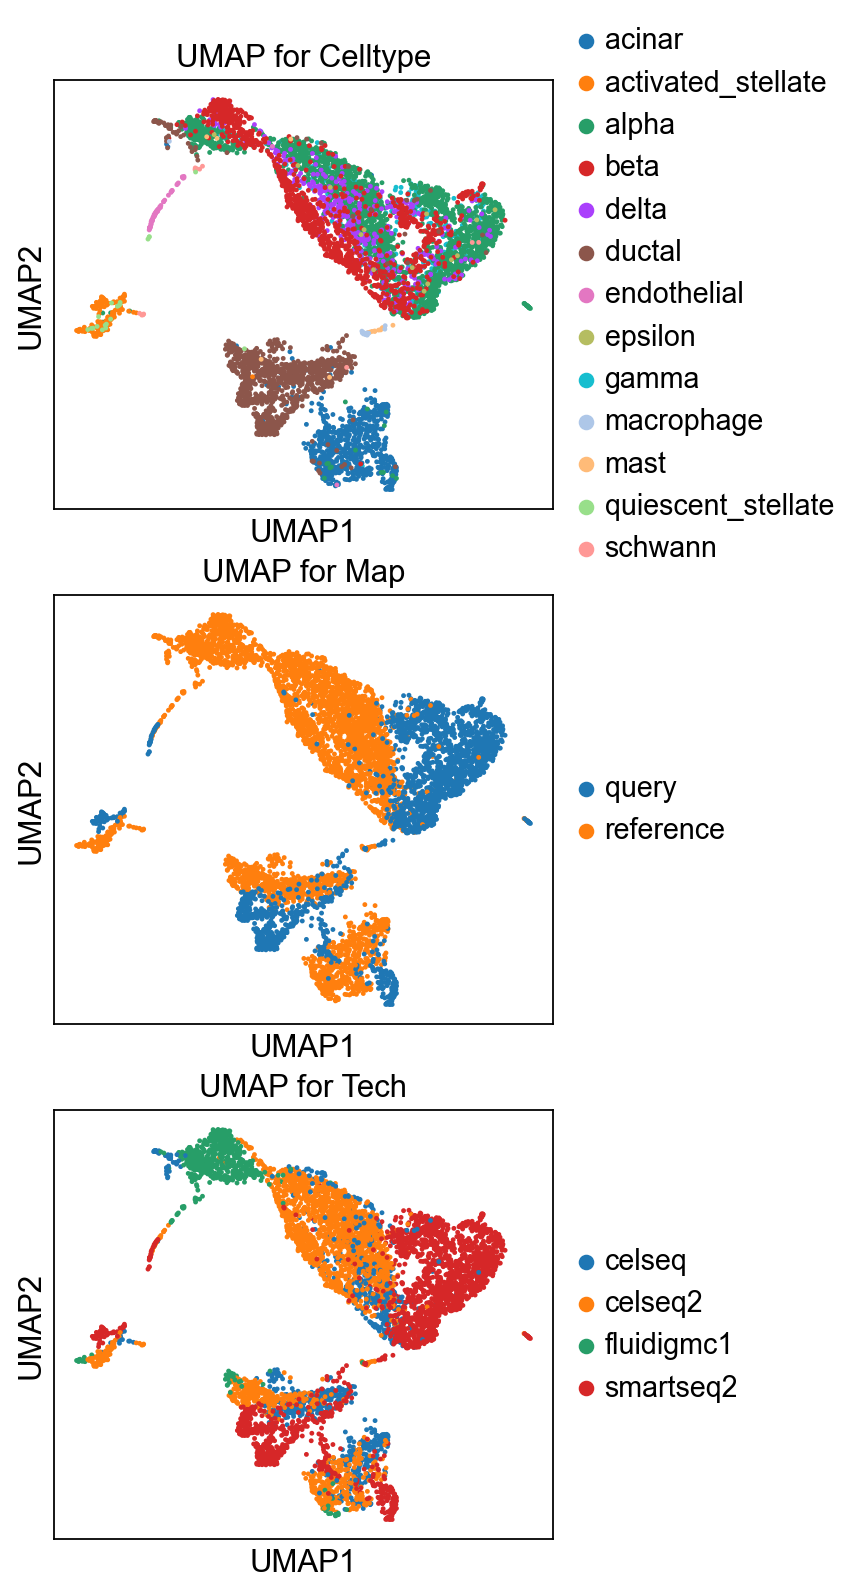

In [27]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
sc.set_figure_params(figsize=(4, 4))

fig, axes = plt.subplots(3, 1, figsize=(4, 12))

sc.pl.umap(adata, color=["celltype"], ax=axes[0], show=False)
axes[0].set_title("UMAP for Celltype") 

sc.pl.umap(adata, color=["map"], ax=axes[1], show=False)
axes[1].set_title("UMAP for Map")

sc.pl.umap(adata, color=["tech"], ax=axes[2], show=False)
axes[2].set_title("UMAP for Tech") 


plt.savefig('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/results/gpt_ft/freeze_enc/umap.png',dpi=300,bbox_inches='tight')

In [28]:
embs = adata.obsm['X_scGPT'].copy()

In [29]:
embs.shape

(6321, 512)

In [30]:
# adata.write_h5ad('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/results/adata_scgpt_scvi.h5ad')
np.save('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/results/gpt_ft/freeze_enc/embeds_scgpt.npy',embs)

### ablation

In [2]:
plt.rcParams["font.family"] = "Arial"

In [4]:
metrics = pd.read_csv('ablation_study/scimilarity_metrics_abl.csv')

In [5]:
metrics_sub = metrics.loc[:,['model', 'n_centroids', 'n_probe', 'query_method', 'Top-K Vote Accuracy', 'Top-K Average Accuracy',
       'Mean Average Precision (MAP)',
       'Normalized Discounted Cumulative Gain (nDCG)',
       'Mean Reciprocal Rank (MRR)', 'Average Entropy', 'Average α-NDCG',
       'MAP_gini', 'MAP_celltype_gini']]

In [6]:
metrics_sub['celltype'] = metrics_sub[['Top-K Vote Accuracy', 'Top-K Average Accuracy',
       'Mean Average Precision (MAP)',
       'Normalized Discounted Cumulative Gain (nDCG)',
       'Mean Reciprocal Rank (MRR)']].mean(1)

In [7]:
metrics_sub['batch'] = metrics_sub[['Average Entropy', 'Average α-NDCG']].mean(1)
metrics_sub['fairness'] = (1-metrics_sub[['MAP_gini', 'MAP_celltype_gini']]).mean(1)

In [8]:
metrics_sub[['index_build_time','Query Time', 'Queries per second']] = metrics[['index_build_time','Query Time', 'Queries per second',]]

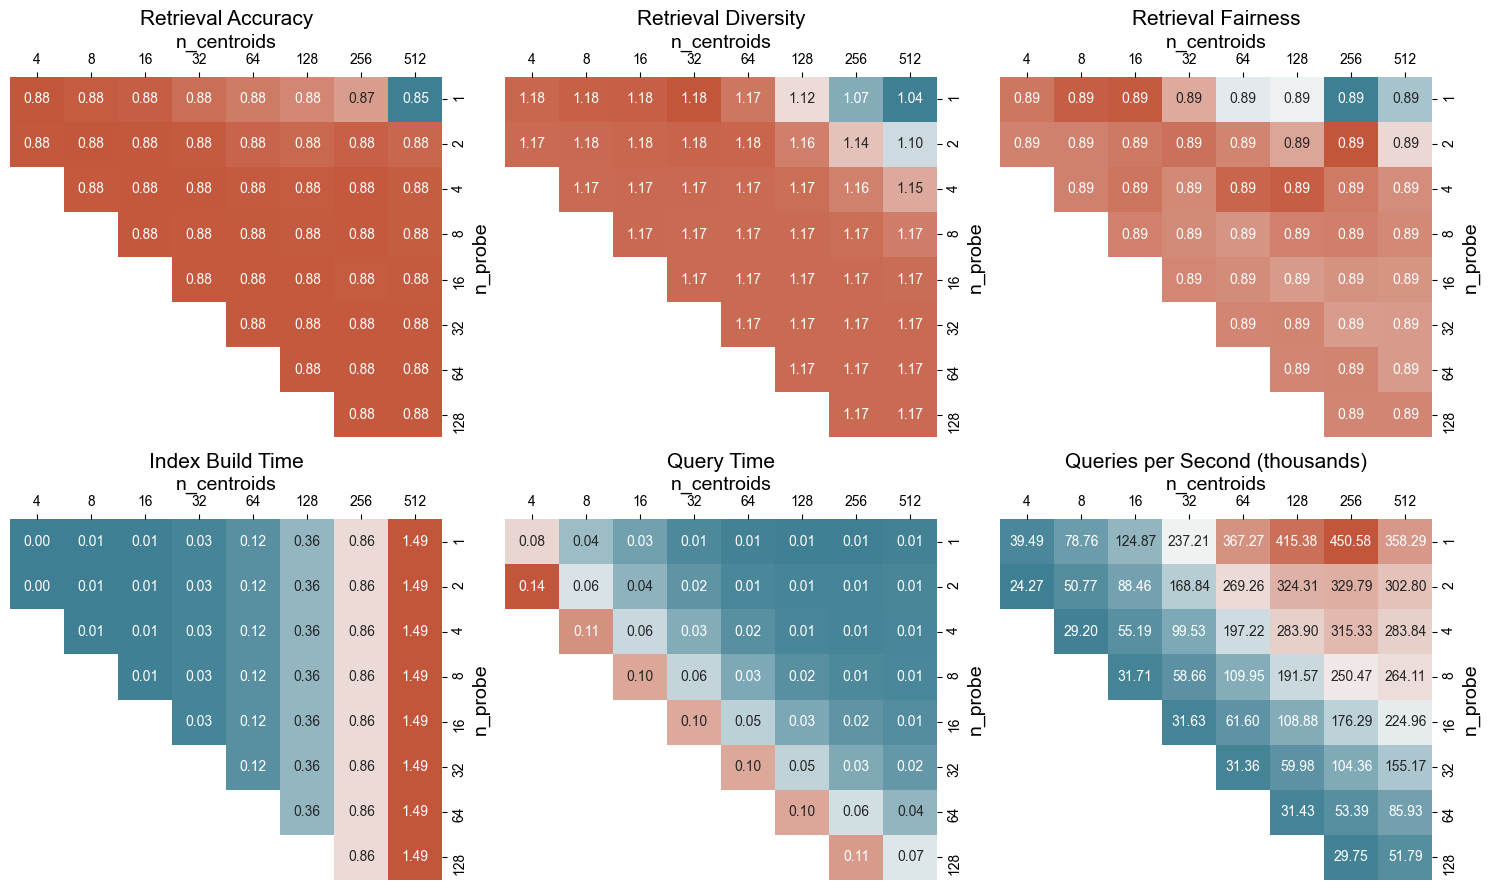

In [9]:
all_metrics = ['celltype','batch','fairness','index_build_time', 'Query Time', 'Queries per second']
all_names = ['Retrieval Accuracy','Retrieval Diversity','Retrieval Fairness','Index Build Time','Query Time','Queries per Second']
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

for i, me in enumerate(all_metrics):
    
    ax = axes[int(i/3),int(i%3)]
    
    pivot_table = metrics_sub.pivot_table(index='n_probe', columns='n_centroids', values=me,aggfunc='mean')
    xticks=pivot_table.columns.values
    yticks=pivot_table.index.values
    if me == 'Queries per second':
        pivot_table = pivot_table/1000
    mask = np.isnan(pivot_table.values)
    sns.heatmap(pivot_table.values, 
                mask=mask, 
                annot=True, 
                fmt=".2f", 
                cmap=sns.diverging_palette(220, 20, as_cmap=True),
                cbar=False,
                ax=ax)
    ax.set_xticklabels(xticks)
    ax.set_yticklabels(yticks)

    ax.xaxis.tick_top()
    ax.yaxis.tick_right()
    ax.xaxis.set_label_position('top') 
    ax.yaxis.set_label_position('right')
    ax.set_xlabel('n_centroids',fontsize=14)
    ax.set_ylabel('n_probe',fontsize=14)
    if me != 'Queries per second':
        ax.set_title(all_names[i],fontsize=15)
    else:
        ax.set_title(f'{all_names[i]} (thousands)',fontsize=15)
# plt.xlabel("n_centroids")
# plt.ylabel("n_probe")
plt.tight_layout()
plt.savefig('/Users/liuxinyuan/Desktop/new_projects/cell_retrieval/plots/supplement/ablation/ablation_heatmap.pdf',format='pdf')
plt.show()